## Work
### 請結合前面的知識與程式碼，比較不同的 regularization 的組合對訓練的結果與影響：如 dropout, regularizers, batch-normalization 等

In [8]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [9]:
train, test = keras.datasets.cifar10.load_data()

In [10]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [11]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
from keras.layers import BatchNormalization, Dropout
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128],  l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [13]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [14]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for i, l2exp in enumerate(L2_EXP):
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=l2exp)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 6s 115us/step - loss: 0.1769 - acc: 0.9528 - val_loss: 2.3491 - val_acc: 0.4810
Epoch 50/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.1667 - acc: 0.9559 - val_loss: 2.5195 - val_acc: 0.4697
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
________

50000/50000 [==============================] - 9s 173us/step - loss: 0.1941 - acc: 0.9464 - val_loss: 2.5382 - val_acc: 0.4602
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1951 - acc: 0.9438 - val_loss: 2.3372 - val_acc: 0.4792
Epoch 49/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1823 - acc: 0.9500 - val_loss: 2.4137 - val_acc: 0.4722
Epoch 50/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.1720 - acc: 0.9531 - val_loss: 2.3948 - val_acc: 0.4710
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048 

50000/50000 [==============================] - 6s 113us/step - loss: 0.2305 - acc: 0.9335 - val_loss: 2.2353 - val_acc: 0.4779
Epoch 46/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.2163 - acc: 0.9377 - val_loss: 2.3380 - val_acc: 0.4630
Epoch 47/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2075 - acc: 0.9403 - val_loss: 2.4033 - val_acc: 0.4605
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.1949 - acc: 0.9449 - val_loss: 2.4255 - val_acc: 0.4697
Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.1775 - acc: 0.9522 - val_loss: 2.4643 - val_acc: 0.4711
Epoch 50/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.1760 - acc: 0.9511 - val_loss: 2.4575 - val_acc: 0.4702
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)     

50000/50000 [==============================] - 6s 115us/step - loss: 0.2494 - acc: 0.9278 - val_loss: 2.3640 - val_acc: 0.4719
Epoch 44/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2326 - acc: 0.9334 - val_loss: 2.3259 - val_acc: 0.4645
Epoch 45/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.2314 - acc: 0.9326 - val_loss: 2.2557 - val_acc: 0.4656
Epoch 46/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2201 - acc: 0.9351 - val_loss: 2.5260 - val_acc: 0.4692
Epoch 47/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.2021 - acc: 0.9443 - val_loss: 2.3366 - val_acc: 0.4717
Epoch 48/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.1939 - acc: 0.9458 - val_loss: 2.3930 - val_acc: 0.4868
Epoch 49/50
50000/50000 [==============================] - 6s 112us/step - loss: 0.1797 - acc: 0.9509 - val_loss: 2.5633 - val_acc: 0.4517
Epoch 50/50
50000/50000 [==============

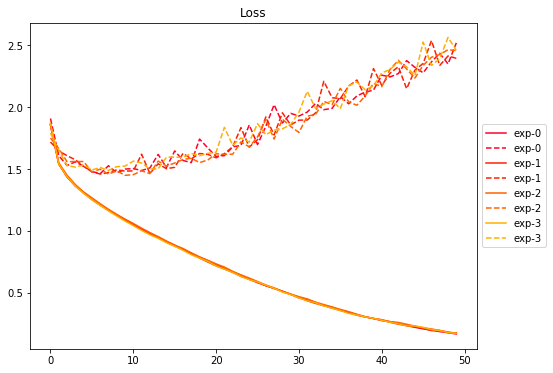

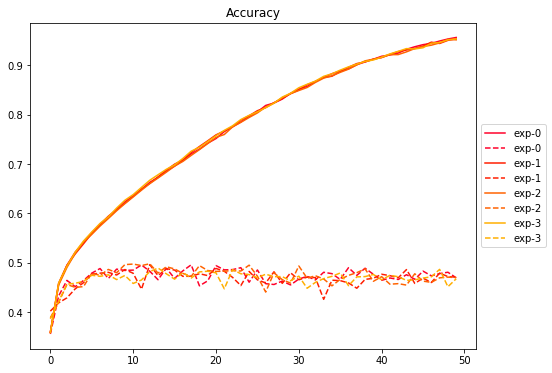

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
"""Code Here
將結果繪出
"""
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()